In [1]:
import numpy as np
import sys
import h5py
import tables
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cv2
import socket

from tqdm import tqdm

import sys
from pathlib import Path

In [2]:
# plt.style.use('dark_background')
#matplotlib.rcParams.keys()
plt.rcParams['figure.figsize'] = (10, 6)
plt.rc('font', size=11)
length = 8
width = 1.5
plt.rcParams['xtick.major.size'] = length
plt.rcParams['ytick.major.size'] = length
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.major.width'] = width

In [3]:
run = 0
exp = 'XXXXXX'

p = Path('/sdf/data/lcls/ds/{}/{}/hdf5/smalldata/'.format(exp[:3], exp))
print(p.exists())

it = p.glob('{}_Run{:04d}*'.format(exp,run))
try:
    f = next(it)
    print(f)
    on = 0
    try:
        f_on = next(it)
        print(f_on)
        on = 1
    except: print('No laser for this run')
    print('\n')
except: print('No files for this run found at this path.')

# examples
on = 1
f = Path('/sdf/data/lcls/ds/xpp/xpptut15/hdf5/smalldata/data_examples/cube_example_off.h5')
f_on = Path('/sdf/data/lcls/ds/xpp/xpptut15/hdf5/smalldata/data_examples/cube_example_on.h5')

rr = tables.File(f).root
h5 = h5py.File(f)
print('\n'.join(h5.keys()))

if on:
    rr_on = tables.File(f_on).root

False
No files for this run found at this path.
binVar
binVar_bins
cubeSelection
delay
diodeU__channels
ipm2__sum
ipm3__sum
jungfrau1M_cfg
jungfrau1M_data
jungfrau1M_nEntries
nEntries


In [4]:
# helper dict to find data in file
dataDict = {
    # 'scanvar': 'enc/lasDelay',
    'det': 'jungfrau1M_data',
    'i0': 'ipm2__sum',
    'conf': 'jungfrau1M_cfg'
}

# Sum of all images

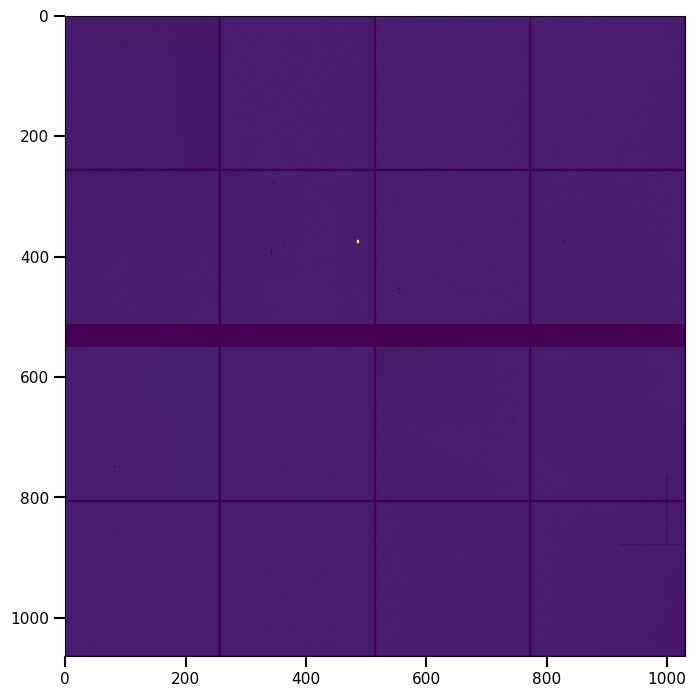

In [10]:
fig, ax = plt.subplots(figsize=(8,12))
ax.imshow(rr[dataDict['det']][:].sum(axis=0)*rr[dataDict['conf']]['calib_mask'][:], clim=(0,1e5))
plt.show()

# Set region of interest

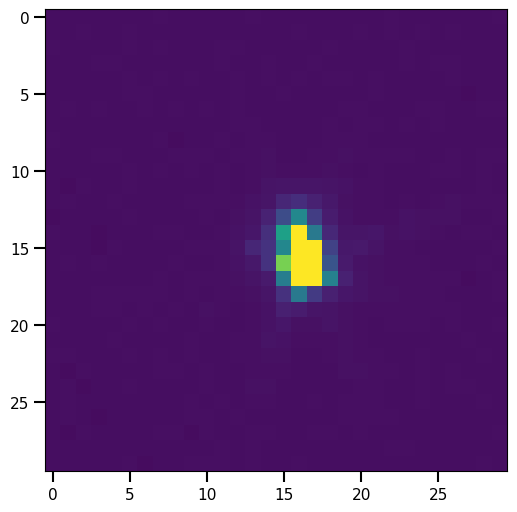

In [6]:
roi = [[360,390],[470,500]]
fig, ax = plt.subplots(figsize=(8,6))
ax.imshow(rr[dataDict['det']][:,roi[0][0]:roi[0][1], roi[1][0]:roi[1][1]].sum(axis=0), clim=(0,2e5))
plt.show()

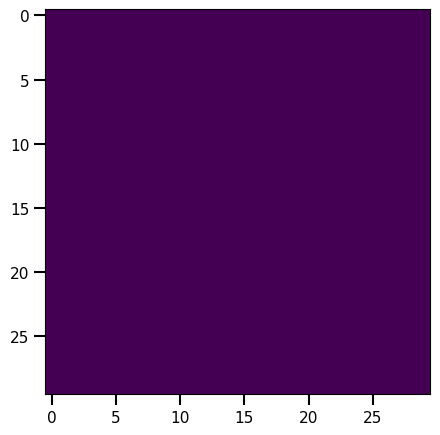

In [7]:
# mask for that region:
rr.jungfrau1M_cfg.calib_mask
pixel_mask = rr[dataDict['conf']]['calib_mask'][roi[0][0]:roi[0][1], roi[1][0]:roi[1][1]]
# pixel_mask = rr[dataDict['conf']]['calib_mask'][:]

fig, ax = plt.subplots(figsize=(6,5))
ax.imshow(pixel_mask)
plt.show()

# Integrated ROI as a function of bin

In [8]:
signal = np.sum(pixel_mask*rr[dataDict['det']][:,roi[0][0]:roi[0][1], roi[1][0]:roi[1][1]], axis=(1,2)) / rr[dataDict['i0']]

if on:
    signal_on = rr_on[dataDict['det']][:,roi[0][0]:roi[0][1], roi[1][0]:roi[1][1]].sum(axis=(1,2)) / rr_on[dataDict['i0']]

if 'delay' in rr._v_children:
    x = rr.binVar_bins[1:]-np.diff(rr.binVar_bins)/2 # binVar_bins are the bin edges
    signal = signal[1:]
    if on:
        signal_on = signal_on[1:]
else:
    # in case of data with fixed position (not delay), the right bin edges is the data position. The first datapoint is thus Nan
    x = rr.binVar_bins[:]

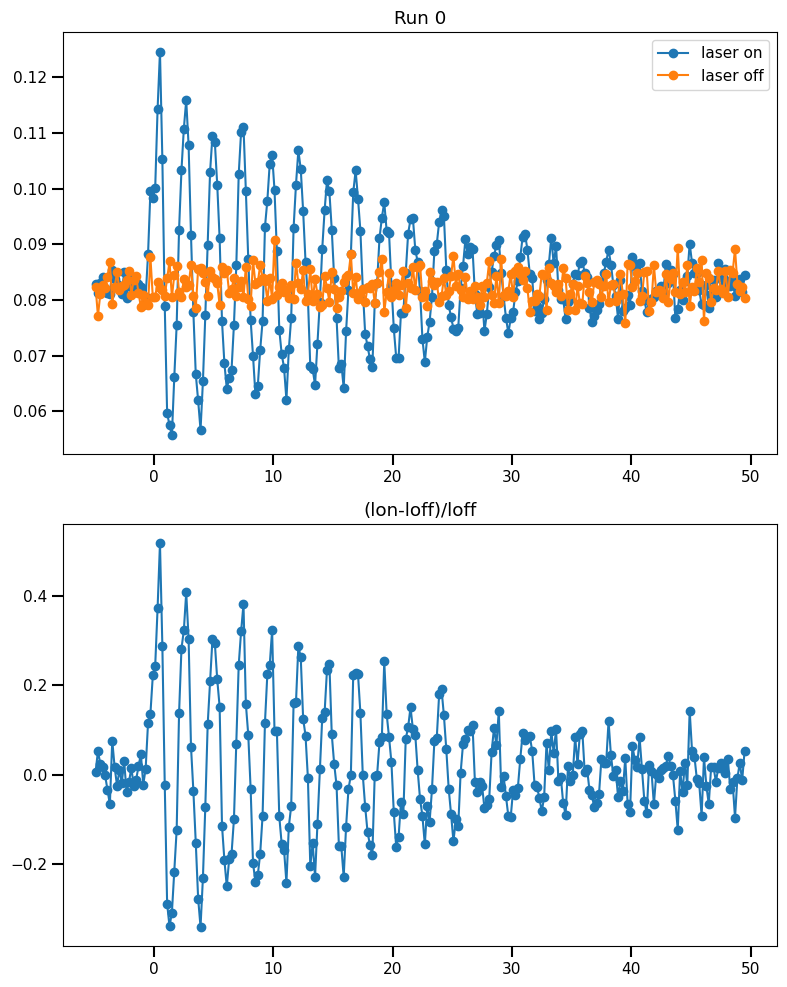

In [11]:
if on:
    fig, ax = plt.subplots(nrows=2, figsize=(8,10))
    ax[0].set_title('Run {}'.format(run))
    ax[0].plot(x, signal_on, '-o', label='laser on')
    ax[0].plot(x, signal, '-o', label='laser off')
    ax[0].legend()

    ax[1].set_title('(lon-loff)/loff')
    ax[1].plot(x, (signal_on-signal)/signal, '-o')
    # ax[1].set_xlim(-2,10)
    plt.tight_layout()
    plt.show()
else:
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_title('Run {}'.format(run))
    ax.plot(x, signal, '-o')
    # ax[1].set_xlim(-2,10)
    plt.tight_layout()
    plt.show()